**3.	Which player has the highest number of wins?**

Importing required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables

In [14]:
MatchEventInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchEventInfo.csv')
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')

**Calculating number of players'win**

droping duplicated data

In [15]:
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')
MatchEventInfo_dd = MatchEventInfo.drop_duplicates (subset = 'match_id')

Merging the tables

In [58]:
merged_HW = MatchHomeTeamInfo_dd[['match_id' ,
                                  'player_id']].merge(MatchAwayTeamInfo_dd[['match_id' ,
                                                                            'player_id']],
                                                                             on ='match_id').drop_duplicates('match_id')
merged_EHW = merged_HW[['match_id' ,
                        'player_id_x' , 'player_id_y']].merge(MatchEventInfo_dd[['match_id',
                                                                                 'winner_code']],
                                                                                  on ='match_id').drop_duplicates ('match_id')
merged_EHW = merged_EHW.dropna()
#Mapping the winner_code values
merged_EHW['winner_id'] = merged_EHW.apply( lambda x : 
                                           x['player_id_x']  if x['winner_code']==1 else x['player_id_y'] , axis = 1)
merged_EHW.head(2)

,match_id,player_id_x,player_id_y,winner_code,winner_id
0,12260075,14486,254742,2.0,254742.0
1,12260076,206570,90080,1.0,206570.0


Counting the  number winned match for each player

In [59]:
merged_winner = merged_EHW.groupby('winner_id', as_index =False).aggregate(no_win = ('match_id' ,'count'))
merged_player = merged_winner.merge(
    pd.concat ([MatchHomeTeamInfo[['player_id', 'name']] ,
                MatchAwayTeamInfo[['player_id', 'name']]]).drop_duplicates(subset = 'player_id'),
                  left_on='winner_id',
                  right_on='player_id',
                  how = 'right').drop('winner_id' , axis =1)
merged_player = merged_player.fillna(0)
merged_player.head(2)

,no_win,player_id,name
0,1.0,14486,Nadal R.
1,3.0,206570,Sinner J.


**Reporting the best player with the most wins**

In [62]:
best_win_no = merged_player['no_win'].max()
best_winer_id = merged_player['player_id'].loc[merged_player['no_win'] == merged_player['no_win'].max()].values[0]
best_winer_name = merged_player['name'].loc[merged_player['no_win'] == merged_player['no_win'].max()].values[0]
print (f'The highest number of wins is {best_win_no} whitch is gained by {best_winer_name} with {best_winer_id} ID')


The highest number of wins is 17.0 whitch is gained by Uchijima M. with 253356 ID


Plotting the histogram of wins

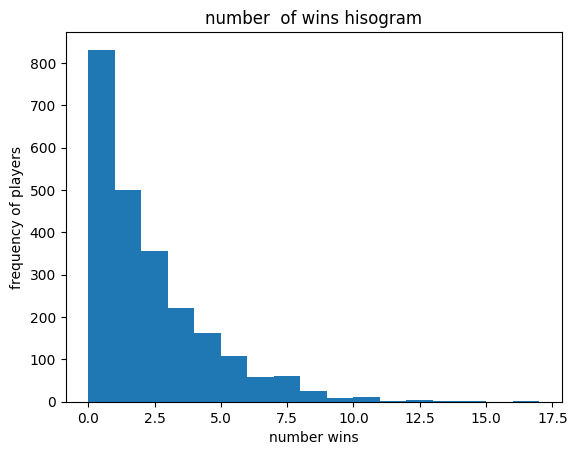

In [63]:
plt.hist(merged_player['no_win'] , bins= 17)
plt.xlabel('number wins')
plt.ylabel('frequency of players')
plt.title('number  of wins hisogram')
plt.show()